Feature Importances:
         Feature  Importance
1      feature_2    0.040874
137  feature_138    0.037595
16    feature_17    0.029628
31    feature_32    0.029335
72    feature_73    0.021838
..           ...         ...
133  feature_134    0.000000
67    feature_68    0.000000
77    feature_78    0.000000
113  feature_114    0.000000
41    feature_42    0.000000

[175 rows x 2 columns]


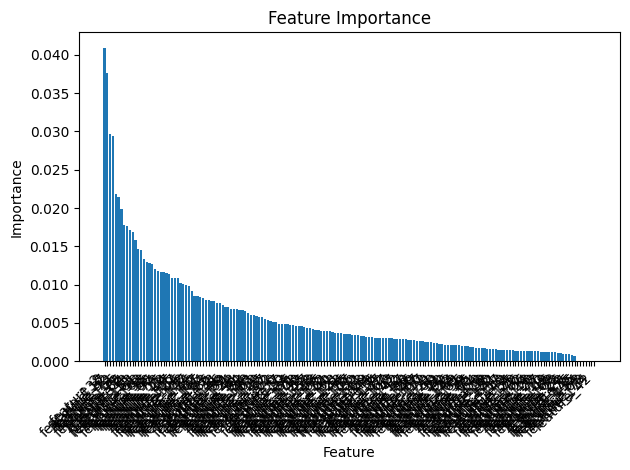

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the trained model from the pickle file
with open('pikle_files//final_xgboost_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

# Check if the model has a 'feature_importances_' attribute
if hasattr(saved_model, 'feature_importances_'):
    # Get feature importances from the loaded model
    feature_importances = saved_model.feature_importances_

    # Check if the model has a 'get_feature_names_out' method
    if hasattr(saved_model, 'get_feature_names_out'):
        # If available, use 'get_feature_names_out' to get feature names
        feature_names = saved_model.get_feature_names_out()
    else:
        # If not available, try to get feature names from the model's input features
        try:
            feature_names = saved_model.get_params()['feature_names_in_']
        except KeyError:
            # If not found, use generic names
            n_features = len(feature_importances)
            feature_names = [f'feature_{i}' for i in range(1, n_features + 1)]
else:
    raise ValueError("The loaded model does not have feature importances.")

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [6]:
feature_importances[:31]

array([0.00767142, 0.04087377, 0.00144056, 0.01712975, 0.000828  ,
       0.00488889, 0.00485183, 0.00163853, 0.00308519, 0.00124594,
       0.02146134, 0.00287229, 0.00124421, 0.01092782, 0.0114869 ,
       0.00117721, 0.02962768, 0.00130035, 0.00219719, 0.00090025,
       0.00241791, 0.00101917, 0.00437144, 0.00130663, 0.0014048 ,
       0.00093127, 0.01018491, 0.00127109, 0.01139012, 0.00486498,
       0.00366056], dtype=float32)

Feature Importances:
                           Feature  Importance
1                    property_size    0.040874
137  locality_Rajarajeshwari Nagar    0.037595
16                            POOL    0.029628
31             locality_AGS Layout    0.029335
72             locality_HSR Layout    0.021838
..                             ...         ...
133   locality_Pattanduru Agrahara    0.000000
67          locality_Gayatri Nagar    0.000000
77                locality_Haralur    0.000000
113          locality_Mahadevapura    0.000000
41      locality_Basaveshwaranagar    0.000000

[175 rows x 2 columns]


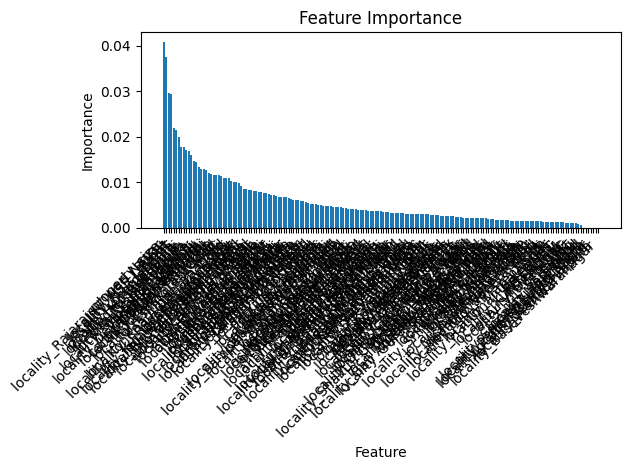

In [7]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the trained model from the pickle file
with open('pikle_files//final_xgboost_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

# Check if the model has a 'feature_importances_' attribute
if hasattr(saved_model, 'feature_importances_'):
    # Get feature importances from the loaded model
    feature_importances = saved_model.feature_importances_

    # Check if the model has a 'get_booster' method
    if hasattr(saved_model, 'get_booster'):
        # If available, use 'get_booster' to access the underlying booster model
        booster = saved_model.get_booster()
        # Get feature names from the booster
        feature_names = booster.feature_names
    else:
        # If not available, use generic names
        n_features = len(feature_importances)
        feature_names = [f'feature_{i}' for i in range(1, n_features + 1)]
else:
    raise ValueError("The loaded model does not have feature importances.")

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


Aggregated Locality Feature Importances:
                 Locality  Importance
107  Rajarajeshwari Nagar    0.037595
1              AGS Layout    0.029335
42             HSR Layout    0.021838
75            Koramangala    0.019850
48            Hemmigepura    0.017798
..                    ...         ...
83           Mahadevapura    0.000000
114     Shankar Matt Ward    0.000000
37          Gayatri Nagar    0.000000
103   Pattanduru Agrahara    0.000000
104    Prakash Nagar Ward    0.000000

[145 rows x 2 columns]


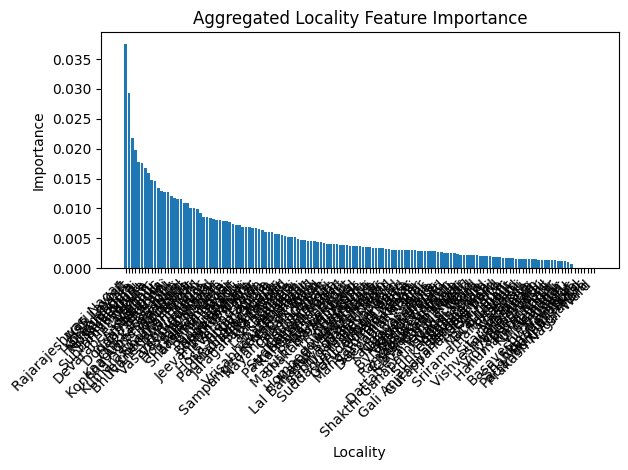

In [9]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the trained model from the pickle file
with open('pikle_files//final_xgboost_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

# Check if the model has a 'feature_importances_' attribute
if hasattr(saved_model, 'feature_importances_'):
    # Get feature importances from the loaded model
    feature_importances = saved_model.feature_importances_

    # Check if the model has a 'get_booster' method
    if hasattr(saved_model, 'get_booster'):
        # If available, use 'get_booster' to access the underlying booster model
        booster = saved_model.get_booster()
        # Get original feature names (including one-hot encoded columns)
        feature_names = booster.feature_names

        # Create a mapping of original localities to their one-hot encoded columns
        locality_columns = [col for col in feature_names if 'locality_' in col]
        locality_mapping = {col.split('_')[1]: col for col in locality_columns}

        # Aggregate feature importances across localities
        aggregated_locality_importances = {}
        for locality, col in locality_mapping.items():
            if col in feature_names:
                importance = feature_importances[feature_names.index(col)]
                aggregated_locality_importances[locality] = aggregated_locality_importances.get(locality, 0) + importance

        # Create a DataFrame to display feature importances for localities
        locality_importance_df = pd.DataFrame(list(aggregated_locality_importances.items()), columns=['Locality', 'Importance'])
        locality_importance_df = locality_importance_df.sort_values(by='Importance', ascending=False)

        # Display feature importances for localities
        print("Aggregated Locality Feature Importances:")
        print(locality_importance_df)

        # Plot the feature importances for localities
        plt.bar(locality_importance_df['Locality'], locality_importance_df['Importance'])
        plt.xlabel('Locality')
        plt.ylabel('Importance')
        plt.title('Aggregated Locality Feature Importance')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
        plt.tight_layout()
        plt.show()

    else:
        # If not available, use generic names
        n_features = len(feature_importances)
        feature_names = [f'feature_{i}' for i in range(1, n_features + 1)]
else:
    raise ValueError("The loaded model does not have feature importances.")


Feature Importances (excluding locality):
               Feature  Importance
1        property_size    0.040874
16                POOL    0.029628
10                LIFT    0.021461
3             bathroom    0.017130
14                CLUB    0.011487
28  furnishing_encoded    0.011390
13                  AC    0.010928
26                  PB    0.010185
0                 type    0.007671
5            cup_board    0.004889
29     parking_encoded    0.004865
6                floor    0.004852
22                  GP    0.004371
8        building_type    0.003085
11                 GYM    0.002872
20            SECURITY    0.002418
18                  FS    0.002197
7         water_supply    0.001639
2         property_age    0.001441
24                 STP    0.001405
23                 RWH    0.001307
17                 CPA    0.001300
27                  VP    0.001271
9            balconies    0.001246
12            INTERNET    0.001244
15            INTERCOM    0.001177
21           

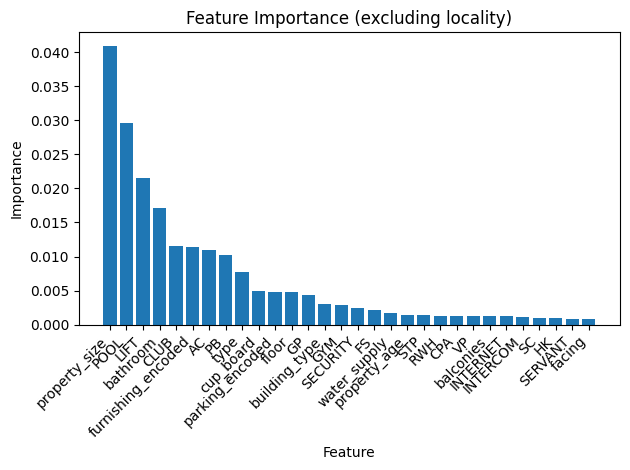

In [10]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the trained model from the pickle file
with open('pikle_files//final_xgboost_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

# Check if the model has a 'feature_importances_' attribute
if hasattr(saved_model, 'feature_importances_'):
    # Get feature importances from the loaded model
    feature_importances = saved_model.feature_importances_

    # Check if the model has a 'get_booster' method
    if hasattr(saved_model, 'get_booster'):
        # If available, use 'get_booster' to access the underlying booster model
        booster = saved_model.get_booster()
        # Get original feature names (including one-hot encoded columns)
        feature_names = booster.feature_names

        # Filter out non-locality features
        locality_columns = [col for col in feature_names if 'locality_' in col]
        non_locality_columns = [col for col in feature_names if col not in locality_columns]

        # Create a DataFrame to display feature importances for non-locality features
        non_locality_importance_df = pd.DataFrame({'Feature': non_locality_columns, 'Importance': feature_importances[:len(non_locality_columns)]})
        non_locality_importance_df = non_locality_importance_df.sort_values(by='Importance', ascending=False)

        # Display feature importances for non-locality features
        print("Feature Importances (excluding locality):")
        print(non_locality_importance_df)

        # Plot the feature importances for non-locality features
        plt.bar(non_locality_importance_df['Feature'], non_locality_importance_df['Importance'])
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title('Feature Importance (excluding locality)')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
        plt.tight_layout()
        plt.show()

    else:
        # If not available, use generic names
        n_features = len(feature_importances)
        feature_names = [f'feature_{i}' for i in range(1, n_features + 1)]
else:
    raise ValueError("The loaded model does not have feature importances.")



Feature Importances:
               Feature  Importance
0        property_size    0.040874
1                 POOL    0.029628
2                 LIFT    0.021461
3             bathroom    0.017130
4                 CLUB    0.011487
5   furnishing_encoded    0.011390
6                   AC    0.010928
7                   PB    0.010185
8                 type    0.007671
9            cup_board    0.004889
10     parking_encoded    0.004865
11               floor    0.004852
12                  GP    0.004371
13       building_type    0.003085
14                 GYM    0.002872
15            SECURITY    0.002418
16                  FS    0.002197
17        water_supply    0.001639
18        property_age    0.001441
19                 STP    0.001405
20                 RWH    0.001307
21                 CPA    0.001300
22                  VP    0.001271
23           balconies    0.001246
24            INTERNET    0.001244
25            INTERCOM    0.001177
26                  SC    0.00101

C:\Users\Aadhavan\AppData\Local\Temp\ipykernel_175380\2930749791.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Importance', y='Feature', data=updated_importance_df, palette='viridis')


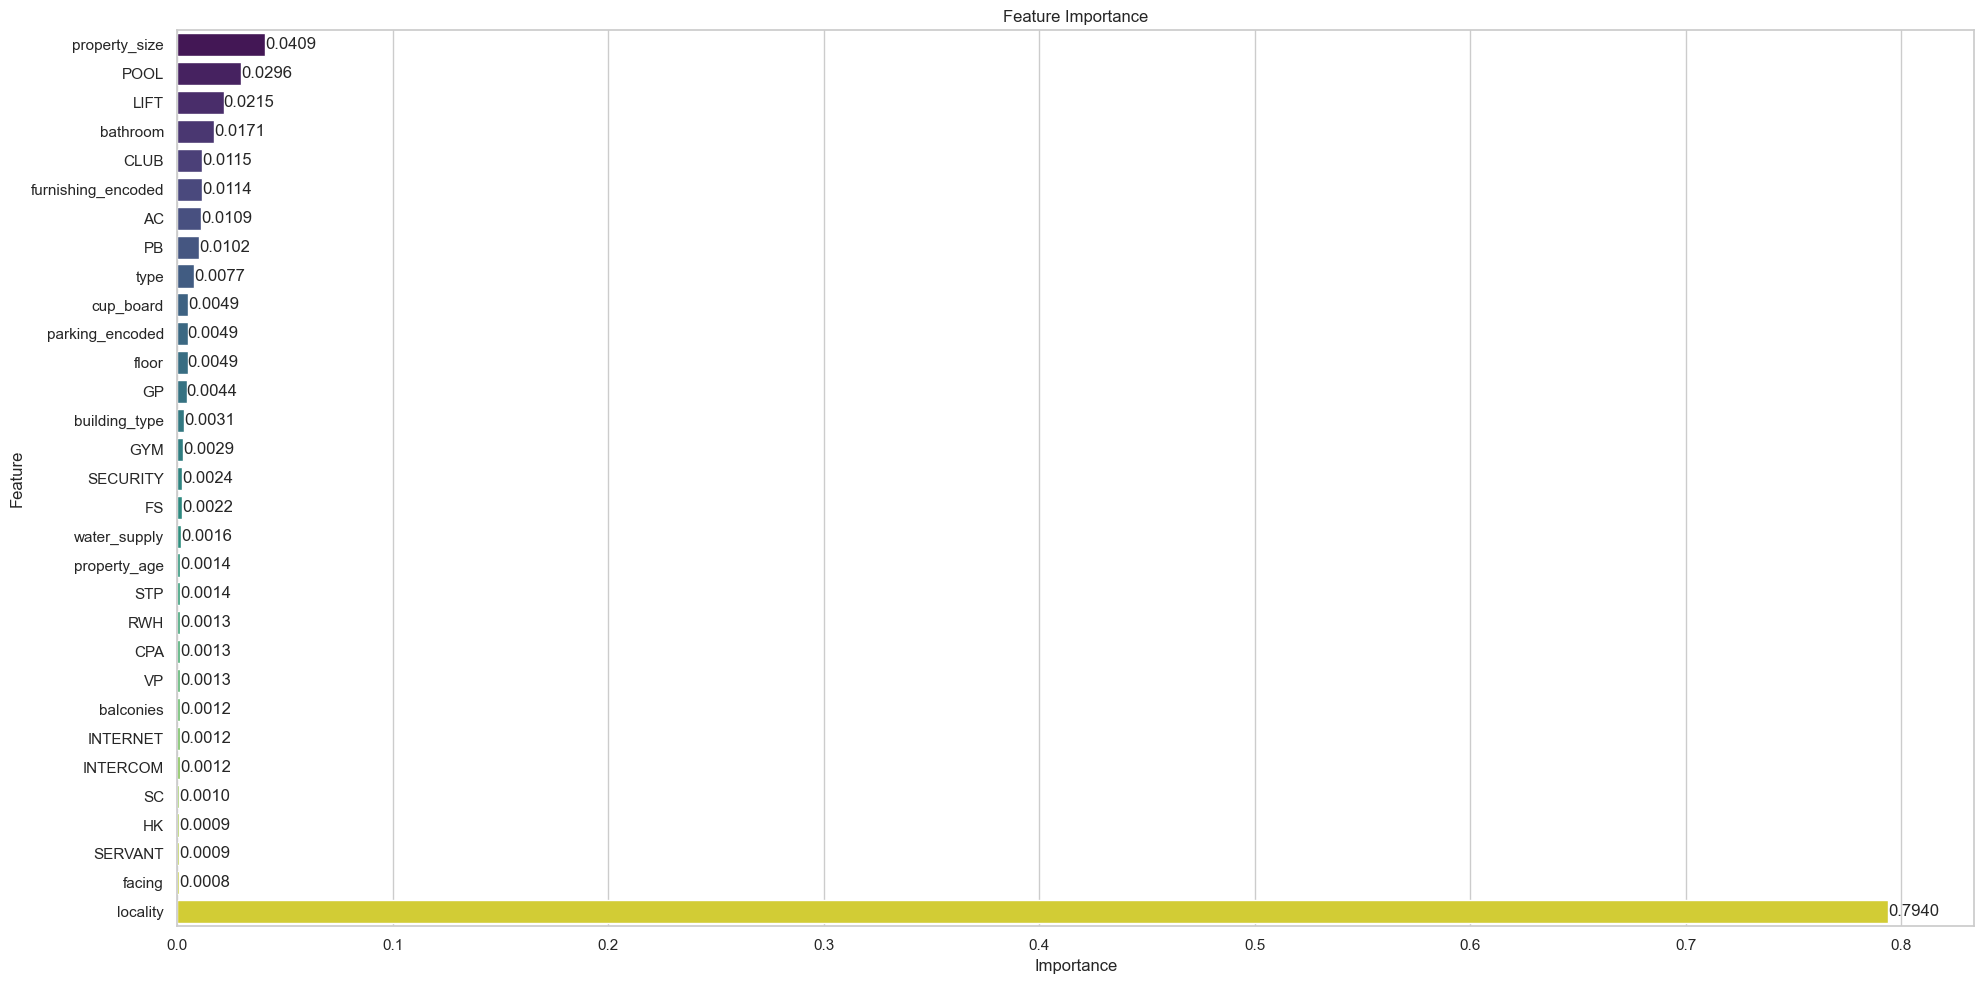

In [23]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model from the pickle file
with open('pikle_files//final_xgboost_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

# Check if the model has a 'feature_importances_' attribute
if hasattr(saved_model, 'feature_importances_'):
    # Get feature importances from the loaded model
    feature_importances = saved_model.feature_importances_

    # Check if the model has a 'get_booster' method
    if hasattr(saved_model, 'get_booster'):
        # If available, use 'get_booster' to access the underlying booster model
        booster = saved_model.get_booster()
        # Get original feature names (including one-hot encoded columns)
        feature_names = booster.feature_names

        # Filter out locality columns
        locality_columns = [col for col in feature_names if 'locality_' in col]
        non_locality_columns = [col for col in feature_names if col not in locality_columns]

        # Create a DataFrame to display feature importances for non-locality features
        non_locality_importance_df = pd.DataFrame({'Feature': non_locality_columns, 'Importance': feature_importances[:len(non_locality_columns)]})
        non_locality_importance_df = non_locality_importance_df.sort_values(by='Importance', ascending=False)


        # Calculate the sum of importance for all locality columns
        locality_importance_sum = np.sum(feature_importances[len(non_locality_columns):])

        # Create a DataFrame for the summed locality importance
        summed_locality_df = pd.DataFrame({'Feature': ['locality'], 'Importance': [locality_importance_sum]})

        # Concatenate DataFrames to include the summed locality importance
        updated_importance_df = pd.concat([non_locality_importance_df, summed_locality_df], ignore_index=True)

        # Display the updated DataFrame with the summed locality importance
        print("Feature Importances:")
        print(updated_importance_df)
        updated_importance_df.to_csv('feature_importance.csv')

      # Set the style for the plot
        sns.set(style="whitegrid")

        plt.figure(figsize=(20, 10))
        bar_plot = sns.barplot(x='Importance', y='Feature', data=updated_importance_df, palette='viridis')

        # Annotate each bar with its value
        for index, value in enumerate(updated_importance_df['Importance']):
            bar_plot.text(value, index, f'{value:.4f}', ha='left', va='center')

        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title('Feature Importance')
        plt.tight_layout()
        plt.show()
    else:
        # If not available, use generic names
        n_features = len(feature_importances)
        feature_names = [f'feature_{i}' for i in range(1, n_features + 1)]
else:
    raise ValueError("The loaded model does not have feature importances.")


Importance of 'locality' feature: 0.14317858


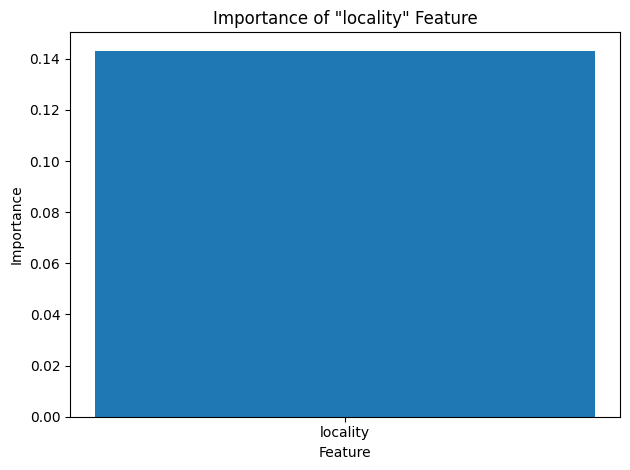

In [14]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the trained model from the pickle file
with open('pikle_files//final_xgboost_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

# Check if the model has a 'feature_importances_' attribute
if hasattr(saved_model, 'feature_importances_'):
    # Get feature importances from the loaded model
    feature_importances = saved_model.feature_importances_

    # Check if the model has a 'get_booster' method
    if hasattr(saved_model, 'get_booster'):
        # If available, use 'get_booster' to access the underlying booster model
        booster = saved_model.get_booster()
        # Get original feature names (including one-hot encoded columns)
        feature_names = booster.feature_names

        # Filter out locality columns
        locality_columns = [col for col in feature_names if 'locality_' in col]

        # Calculate the sum of importance for all locality columns
        locality_importance_sum = np.sum(feature_importances[len(locality_columns):])

        # Display the importance of the summed locality
        print("Importance of 'locality' feature:", locality_importance_sum)

        # Plot the feature importances for the locality feature
        plt.bar(['locality'], [locality_importance_sum])
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title('Importance of "locality" Feature')
        plt.tight_layout()
        plt.show()

    else:
        # If not available, use generic names
        n_features = len(feature_importances)
        feature_names = [f'feature_{i}' for i in range(1, n_features + 1)]
else:
    raise ValueError("The loaded model does not have feature importances.")
